## DATA ANALYTICS PHASE 

In [1]:
# Importing Python Neccesory Libraries
import numpy as np
import pandas as pd

# Importing scipy.stats library 
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Data visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

# Import Stats Model Library
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Importing Data using pandas Function

URL = 'https://raw.githubusercontent.com/chandanc5525/SupplyChain_BusinessModel/main/Dataset/SCM.csv'
df = pd.read_csv(URL)
data = pd.read_csv(URL)
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
15003,WH_115003,EID_65003,Rural,Large,North,Zone 5,2,3,3,4336,...,1,213,31.0,NaN,22,0,B+,5,17,26061
4245,WH_104245,EID_54245,Rural,Large,North,Zone 5,4,0,3,4932,...,0,150,NaN,2008.0,17,1,B+,5,25,20136
17012,WH_117012,EID_67012,Rural,Large,South,Zone 5,2,0,2,5761,...,0,146,27.0,NaN,13,0,B,3,25,16150
11452,WH_111452,EID_61452,Rural,Large,South,Zone 5,7,3,2,4431,...,1,114,29.0,NaN,21,0,C,2,14,27071
13481,WH_113481,EID_63481,Rural,Large,North,Zone 6,4,0,2,3413,...,1,209,36.0,2021.0,5,1,B,2,6,7109
5260,WH_105260,EID_55260,Rural,Mid,South,Zone 2,3,0,3,4301,...,1,227,28.0,1998.0,30,1,C,6,32,40083
17471,WH_117471,EID_67471,Rural,Mid,North,Zone 4,3,1,3,4322,...,1,93,27.0,NaN,20,1,A+,3,26,27075
4345,WH_104345,EID_54345,Rural,Large,West,Zone 6,7,0,1,5673,...,1,202,29.0,1998.0,36,1,A+,6,23,51065
15060,WH_115060,EID_65060,Rural,Small,West,Zone 6,8,0,3,4188,...,1,258,28.0,1999.0,27,0,B,6,15,32088
12129,WH_112129,EID_62129,Rural,Small,South,Zone 1,3,4,2,4563,...,0,101,18.0,2017.0,5,0,B+,6,21,6133


In [3]:
# Checking Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
# Columns in the Dataset
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
# Checking Dataset Description
df.describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150,22150,22150,22150,22150,22150,22150.000000,22150.000000,22150.000000,22150.000000,...,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,21345,22150.000000,22150.000000,22150.000000
unique,22150,22150,2,3,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,1,1,20334,8968,9069,7376,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4859,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.097020,0.777201,3.103928,4983.115711,...,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,NaN,3.487765,18.767765,22086.780813
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606289,1.201747,1.142886,1050.634225,...,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,NaN,1.691661,8.644778,11626.192340
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,...,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4309.250000,...,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,12151.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4859.000000,...,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,20.000000,22099.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5499.000000,...,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30102.000000


In [6]:
# Checking Categorical Information
cat_feature = df[['Location_type','WH_capacity_size','zone','WH_regional_zone',
                               'wh_owner_type','approved_wh_govt_certificate']]
for i in cat_feature:
  print('*'*20)
  print(i)
  print(cat_feature[i].value_counts())
  print('*'*20)

********************
Location_type
Rural    20334
Urban     1816
Name: Location_type, dtype: int64
********************
********************
WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64
********************
********************
zone
North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64
********************
********************
WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64
********************
********************
wh_owner_type
Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64
********************
********************
approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64
********************


## CONVERTING CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS

In [7]:
df['Location_type'] = df['Location_type'].map({'Rural':1,'Urban':0})
df['wh_owner_type'] = df['wh_owner_type'].map({'Company Owned':1,'Rented':0}) 

In [8]:
# Using Label Enconder technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['WH_capacity_size']= label_encoder.fit_transform(df['WH_capacity_size'])
df['zone']= label_encoder.fit_transform(df['zone'])
df['WH_regional_zone']= label_encoder.fit_transform(df['WH_regional_zone'])
df['approved_wh_govt_certificate']= label_encoder.fit_transform(df['approved_wh_govt_certificate'])
df['Ware_house_ID'] = label_encoder.fit_transform(df['Ware_house_ID'])
df['WH_Manager_ID'] = label_encoder.fit_transform(df['WH_Manager_ID']).astype('int64')
df['wh_est_year	'] = label_encoder.fit_transform(df['wh_est_year'])

In [9]:
# Checking random 10 sample 
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,wh_est_year\t
16794,16794,16794,1,1,3,2,4,0,2,5638,...,231,37.0,2000.0,23,0,4,2,19,29092,4
3776,3776,3776,1,0,3,5,7,4,4,5323,...,269,30.0,NaN,7,1,0,1,23,10076,28
14129,14129,14129,1,2,2,0,2,3,2,4742,...,239,25.0,NaN,17,0,3,6,31,20104,28
4907,4907,4907,1,0,1,5,8,1,4,5116,...,97,39.0,2018.0,7,0,4,3,29,9083,22
14120,14120,14120,1,1,2,3,6,1,4,4035,...,209,26.0,2015.0,12,1,1,4,26,16077,19
13580,13580,13580,0,2,1,5,7,3,2,8901,...,62,30.0,NaN,26,0,4,3,13,32146,28
16276,16276,16276,1,0,2,4,5,0,3,5701,...,56,32.0,2003.0,30,0,2,6,14,36130,7
20380,20380,20380,1,0,3,4,4,0,4,4760,...,270,34.0,2018.0,12,1,3,5,25,16071,22
7829,7829,7829,1,2,2,0,2,3,4,9265,...,64,28.0,NaN,21,0,1,2,3,27091,28
4012,4012,4012,1,0,1,5,6,0,4,3844,...,269,28.0,1999.0,32,1,2,3,23,42106,3


In [10]:
# Checling for Null Values in the Dataset
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
wh_est_year\t                       0
dtype: int64

In [11]:
# Missing Percentage in Feature Columns Information
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     0.000000
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

In [12]:
df.wh_est_year.mean()

2009.4012063765617

In [13]:
df['workers_num'] = df['workers_num'].fillna(28)

## HYPOTHESIS TESTING

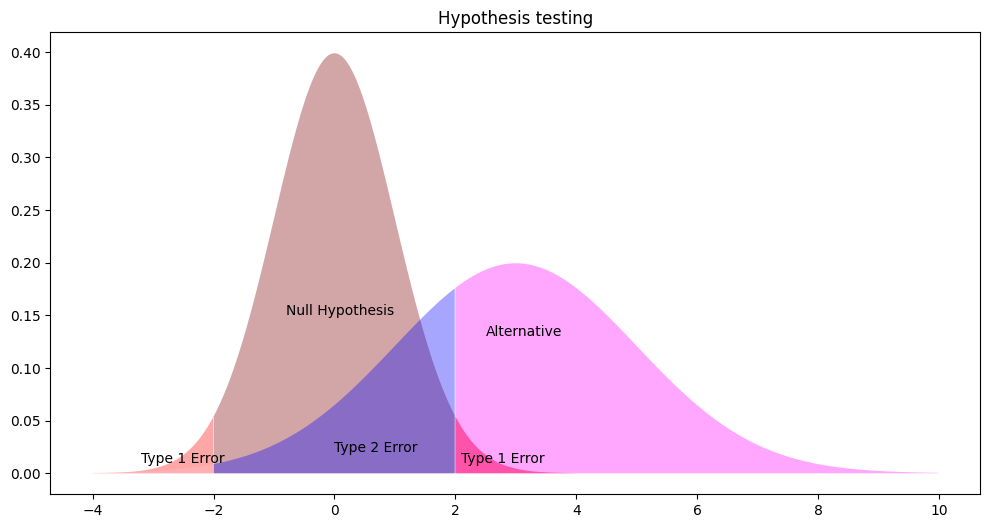

In [14]:
plt.figure(figsize=(12,6))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='maroon',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='pink',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='magenta',
                 alpha=0.35)
plt.title("Hypothesis testing")
plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

#### Hypothesis Testing for Categorical to Numerical Columns 

In [15]:
f_statistic, p_value = stats.f_oneway(df['Ware_house_ID'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=15257.34, p=0.00000000000000000000


In [16]:
f_statistic, p_value = stats.f_oneway(df['WH_Manager_ID'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=15257.34, p=0.00000000000000000000


In [17]:
t,p = stats.ttest_ind(data[data['Location_type']=='Rural']['product_wg_ton'],data[data['Location_type']=='Urban']['product_wg_ton'])
print('t :'+ str(round(t,2)))
print('t=%.2f, p=%.20f' %(t,p))

t :-11.07
t=-11.07, p=0.00000000000000000000


In [18]:
f_statistic, p_value = stats.f_oneway(df['WH_capacity_size'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=79934.19, p=0.00000000000000000000


In [19]:
f_statistic, p_value = stats.f_oneway(df['zone'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=79926.32, p=0.00000000000000000000


In [20]:
f_statistic, p_value = stats.f_oneway(df['WH_regional_zone'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=79916.39, p=0.00000000000000000000


In [21]:
t,p = stats.ttest_ind(data[data['wh_owner_type']=='Rented']['product_wg_ton'],data[data['wh_owner_type']=='Company Owned']['product_wg_ton'])
print('t :'+ str(round(t,2)))
print('t=%.2f, p=%.20f' %(t,p))

t :0.51
t=0.51, p=0.61158875451007932433


In [22]:
f_statistic, p_value = stats.f_oneway(df['approved_wh_govt_certificate'],df['product_wg_ton'])

# Output the results
print('stat=%.2f, p=%.20f' %(f_statistic,p_value))

stat=79923.98, p=0.00000000000000000000


#### Hypothesis Testing for Numerical to Numerical Columns 

In [23]:
R,P = stats.pearsonr(df['num_refill_req_l3m'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.0
P :0.92
stat=0.00, p=0.91989267492983683994


In [24]:
R,P = stats.pearsonr(df['transport_issue_l1y'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.18
P :0.0
stat=-0.18, p=0.00000000000000000000


In [25]:
R,P = stats.pearsonr(df['Competitor_in_mkt'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.01
P :0.28
stat=0.01, p=0.27848681841281763827


In [26]:
R,P = stats.pearsonr(df['retail_shop_num'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.01
P :0.31
stat=-0.01, p=0.31259007105613251243


In [27]:
R,P = stats.pearsonr(df['distributor_num'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.01
P :0.44
stat=0.01, p=0.44404971522041036813


In [28]:
R,P = stats.pearsonr(df['flood_impacted'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.01
P :0.45
stat=-0.01, p=0.45184983951362300836


In [29]:
R,P = stats.pearsonr(df['flood_proof'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.0
P :0.6
stat=-0.00, p=0.59554197309092182788


In [30]:
R,P = stats.pearsonr(df['electric_supply'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.0
P :0.91
stat=-0.00, p=0.91402026048922280221


In [31]:
R,P = stats.pearsonr(df['dist_from_hub'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.01
P :0.37
stat=-0.01, p=0.36871402505469297317


In [32]:
R,P = stats.pearsonr(df['workers_num'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.01
P :0.27
stat=-0.01, p=0.26520196589743239013


In [33]:
R,P = stats.pearsonr(df['storage_issue_reported_l3m'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.99
P :0.0
stat=0.99, p=0.00000000000000000000


In [34]:
R,P = stats.pearsonr(df['temp_reg_mach'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.1
P :0.0
stat=0.10, p=0.00000000000000000000


In [35]:
R,P = stats.pearsonr(df['wh_breakdown_l3m'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :0.34
P :0.0
stat=0.34, p=0.00000000000000000000


In [36]:
R,P = stats.pearsonr(df['govt_check_l3m'],df['product_wg_ton'])
print('R :'+ str(round(R,2)))
print('P :'+ str(round(P,2)))
print('stat=%.2f, p=%.20f' %(R,P))

R :-0.01
P :0.07
stat=-0.01, p=0.07467192869333899585


In [37]:
Result = {  
'Feature Comparison' : ['Ware_house_ID vs product_wg_ton', 'WH_Manager_ID vs product_wg_ton', 'Location_type vs product_wg_ton',
                'WH_capacity_size vs product_wg_ton','zone vs product_wg_ton', 'WH_regional_zone vs product_wg_ton', 
                'num_refill_req_l3m vs product_wg_ton', 'transport_issue_l1y sv product_wg_ton','Competitor_in_mkt vs product_wg_ton',
                'retail_shop_num vs product_wg_ton', 'wh_owner_type vs product_wg_ton','distributor_num vs product_wg_ton',
                'flood_impacted vs product_wg_ton', 'flood_proof vs product_wg_ton', 'electric_supply vs product_wg_ton',
                'dist_from_hub vs product_wg_ton', 'workers_num vs product_wg_ton','storage_issue_reported_l3m vs product_wg_ton',
                'temp_reg_mach vs product_wg_ton','approved_wh_govt_certificate vs product_wg_ton', 'wh_breakdown_l3m vs product_wg_ton', 
                'govt_check_l3m vs product_wg_ton'],
    
'Statistics Used' :        ['Anova Test','Anova Test','T Test','Anova Test','Anova Test','Anova Test','Pearson Correlation',
                 'Pearson Correlation','Pearson Correlation','Pearson Correlation','T Test','Pearson Correlation',
                 'Pearson Correlation','Pearson Correlation','Pearson Correlation','Pearson Correlation','Pearson Correlation',
                 'Pearson Correlation','Pearson Correlation','Anova Test','Pearson Correlation','Pearson Correlation'],
     
'P-value':      [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.91989,0.00000000,
                0.27848,0.31259,0.61158,0.44404,0.45184,0.59554,0.91402,0.36871,0.26520,0.00000000,
                0.00000000,0.00000000,0.00000000,0.07467],
    

'Null Hypothesis' :          ['There is significance association between warehouse_ID and product weight',
                 'There is significance association between WH_Manager_ID and product weight',
                 'In location Type Column, Rural locations are significant to Product weight',
                 'Warehouse Capacity are significant to Product weight',
                 'Zones significantly affecting product weight',
                 'Warehouse Regional locations zone are significant to Product weight',
                 'Refill Request has some significance with product weight in tonns',
                 'Transport issues reported has some significance with product weight',
                 'No.of Competitors in Market has some significance with product weight',
                 'No.of Retailors shops has some significance with product weight',
                 'Warehouse Owner type has some significance with product weight',
                 'Distributor Number has some significance with product weight',
                 'Flood Impacted Regions has some significance with product weight',
                 'Flood Proof Regions has some significance with product weight',
                 'Electric supply with power backup facilities has some significance with product weight',
                 'Distance from Hub has some significance with product weight',
                 'No of workers in Warehouse has some significance with product weight',
                 'Storage issues has some significance with product weight',
                 'Temp reg_match has some significance with product weight',
                 'Approved Govt_Certificates has some significance with product weight',
                 'Warehouse Breakdown has some significance with product weight',
                 'Government inspection checks has some significance with product weight'


                 
                 
],   
    
'Alternate Hypothesis' :          ['There is no significance association between warehouse_ID and product weight',
                 'There is no significance association between WH_Manager_ID  and product weight',
                 'In Location Type Column, Rural locations are not significant to Product weight',
                 'Warehouse Capacity are not significant to Product weight',
                 'Zones are not significantly affecting product weight',
                 'Warehouse Regional locations zone are not significant to Product weight',
                 'Refill Request has no significance with product weight in tonns',
                 'Transport issues reported has no significance with product weight',
                 'No.of Competitors in Market has no significance with product weight',
                 'No.of Retailors shops has no significance with product weight',
                 'Warehouse Owner type has no significance with product weight',
                 'Distributor Number has no significance with product weight',
                 'Flood Impacted Regions has no significance with product weight',
                 'Flood Proof Regions has no significance with product weight',
                 'Electric supply with power backup facilities has no significance with product weight',
                 'Distance from Hub has no significance with product weight',
                 'No of workers in Warehouse has no significance with product weight',
                 'Storage issues has no significance with product weight',
                 'Temp reg_match has no significance with product weight',
                 'Approved Govt_Certificates has no significance with product weight',
                 'Warehouse Breakdown has no significance with product weight',
                 'Government inspection checks has no significance with product weight'

                
                ],
    
'Conclusion' :  ['There is no significance association between warehouse_ID and product weight',
                 'There is no significance association between WH_Manager_ID  and product weight',
                 'In Location Type Column, Rural locations are not significant to Product weight',
                 'Warehouse Capacity are not significant to Product weight',
                 'Zones are not significantly affecting product weight',
                 'Warehouse Regional locations zone are not significant to Product weight',
                 'Refill Request has some significance with product weight in tonns',
                 'Transport issues reported has no significance with product weight',
                 'No.of Competitors in Market has some significance with product weight',
                 'No.of Retailors shops has some significance with product weight',
                 'Warehouse Owner type has some significance with product weight',
                 'Distributor Number has some significance with product weight',
                 'Flood Impacted Regions has some significance with product weight',
                 'Flood Proof Regions has some significance with product weight',
                 'Electric supply with power backup facilities has some significance with product weight',
                 'Distance from Hub has some significance with product weight',
                 'No of workers in Warehouse has some significance with product weight',
                 'Storage issues has some significance with product weight',
                 'Temp reg_match has some significance with product weight',
                 'Approved Govt_Certificates has no significance with product weight',
                 'Warehouse Breakdown has some significance with product weight',
                 'Government inspection checks has some significance with product weight'
                 
               
               
]    
}

result_df = pd.DataFrame(Result)

In [38]:
display(result_df)

,Feature Comparison,Statistics Used,P-value,Null Hypothesis,Alternate Hypothesis,Conclusion
0,Ware_house_ID vs product_wg_ton,Anova Test,0.00000,There is significance association between ware...,There is no significance association between w...,There is no significance association between w...
1,WH_Manager_ID vs product_wg_ton,Anova Test,0.00000,There is significance association between WH_M...,There is no significance association between W...,There is no significance association between W...
2,Location_type vs product_wg_ton,T Test,0.00000,"In location Type Column, Rural locations are s...","In Location Type Column, Rural locations are n...","In Location Type Column, Rural locations are n..."
3,WH_capacity_size vs product_wg_ton,Anova Test,0.00000,Warehouse Capacity are significant to Product ...,Warehouse Capacity are not significant to Prod...,Warehouse Capacity are not significant to Prod...
4,zone vs product_wg_ton,Anova Test,0.00000,Zones significantly affecting product weight,Zones are not significantly affecting product ...,Zones are not significantly affecting product ...
5,WH_regional_zone vs product_wg_ton,Anova Test,0.00000,Warehouse Regional locations zone are signific...,Warehouse Regional locations zone are not sign...,Warehouse Regional locations zone are not sign...
6,num_refill_req_l3m vs product_wg_ton,Pearson Correlation,0.91989,Refill Request has some significance with prod...,Refill Request has no significance with produc...,Refill Request has some significance with prod...
7,transport_issue_l1y sv product_wg_ton,Pearson Correlation,0.00000,Transport issues reported has some significanc...,Transport issues reported has no significance ...,Transport issues reported has no significance ...
8,Competitor_in_mkt vs product_wg_ton,Pearson Correlation,0.27848,No.of Competitors in Market has some significa...,No.of Competitors in Market has no significanc...,No.of Competitors in Market has some significa...
9,retail_shop_num vs product_wg_ton,Pearson Correlation,0.31259,No.of Retailors shops has some significance wi...,No.of Retailors shops has no significance with...,No.of Retailors shops has some significance wi...
